# No.8 Single layer neural network example

Import modules.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160614)
tf.set_random_seed(20160614)

Generate a training dataset.

In [2]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1','x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [-6,-6], 22, 0)
df1 = generate_datablock(15, [9,-6], 22, 0)
df2 = generate_datablock(10, [-6,9], 22, 0)
df3 = generate_datablock(25, [7,7], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

Extract (x1, x2) and t separately into NumPy array objects.

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

Define a single layer neural network.

In [4]:
num_units = 2

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0)

Define a loss funtion, training algorithm and accuracy.

In [5]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Prepare a session and initialize Variables.

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Iterate the optimization using the gradient decent for 1,000 times.

In [7]:
i = 0
for _ in range(1000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 31.598129, Accuracy: 0.769231
Step: 200, Loss: 20.536238, Accuracy: 0.938462
Step: 300, Loss: 16.220718, Accuracy: 0.938462
Step: 400, Loss: 13.880060, Accuracy: 0.953846
Step: 500, Loss: 12.485693, Accuracy: 0.953846
Step: 600, Loss: 11.556995, Accuracy: 0.953846
Step: 700, Loss: 10.878111, Accuracy: 0.953846
Step: 800, Loss: 10.348172, Accuracy: 0.953846
Step: 900, Loss: 9.911016, Accuracy: 0.953846
Step: 1000, Loss: 9.532169, Accuracy: 0.953846


Show a result.

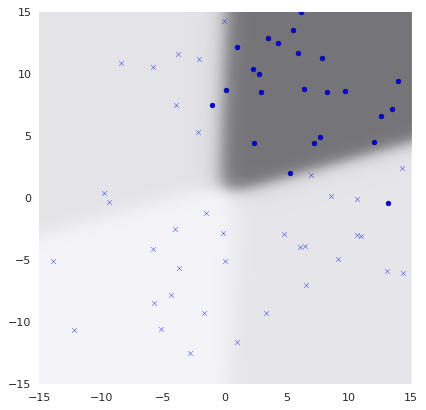

In [8]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.grid(False)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='o')
subplot.scatter(train_set2.x1, train_set2.x2, marker='x')

locations = []
for x2 in np.linspace(-15,15,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15),
               cmap=plt.cm.gray_r, alpha=0.5)